# Amazon Reviews EDA and Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Overview

In [2]:
# Read products and reviews tables created in 'Amazon Reviews Web Scraping.py'
products_df = pd.read_csv('Data/Products.csv')
reviews_df = pd.read_csv('Data/Reviews.csv')

In [3]:
products_df.head()

,asin,Name,Price,Avg Rating,# of Ratings
0,B018MGKXQY,YUM Dinger Classic Worm All-Purpose Soft Plast...,3.49,4.7,3293
1,B07W614F4T,"Dr.Fish 6 Pack Soft Baits, 3.15 Inch Staight T...",7.99,4.2,160
2,B086TNYTF3,YUM Dinger Classic Worm All-Purpose Soft Plast...,27.99,4.7,448
3,B0000C6E0N,Zoom Bait Brush Hog Bait-Pack of 8,3.58,4.6,1024
4,B0BK45ZVL6,"CWSDXM Soft Fishing Lures, 6.5cm/8cm Paddle Ta...",13.99,5.0,1


In [4]:
reviews_df.head()

,asin,Review ID,Title,Body,Rating
0,B08CQ4HXHV,R2Y2A5WJ9Q84I9,\nI keep stocked up\n,\nThis is my go to worm on the Little Pigeon R...,5.0
1,B08CQ4HXHV,RJHR3X7CVOZE8,\nIt just works\n,"\nOne of my most successful soft plastics, the...",4.0
2,B08CQ4HXHV,R2D40LMXK190YP,\nThese baits catch fish!\n,\nThey catch fish and they’re durable too. I’v...,5.0
3,B08CQ4HXHV,R1KKR6D1SQ3D4D,\nThese things just catch fish.\n,\nDon't have the action of a Yamamoto but stil...,4.0
4,B08CQ4HXHV,R1V6NVM2KWFOZ5,\nBass love it\n,"\nIt’s a hit with the bass, but rips easily. ...",4.0


In [5]:
# Example review
reviews_df['Body'][0]

'\nThis is my go to worm on the Little Pigeon River in Tennessee. I saw this on You Tubes Creek Fishing Adventures. When all else fails I turn to this. Many days this was all I needed to haul in large Smallmouth. My current PB was caught on this worm.\n'

In [6]:
products_df.describe()

,Price,Avg Rating,# of Ratings
count,317.000000,317.000000,317.000000
mean,12.689306,4.186751,126.495268
std,7.687224,0.671773,499.747402
min,2.960000,1.000000,1.000000
25%,7.990000,4.000000,2.000000
50%,9.990000,4.300000,9.000000
75%,15.330000,4.500000,48.000000
max,59.990000,5.000000,7039.000000


In [7]:
reviews_df.describe()

,Rating
count,2562.000000
mean,4.384075
std,1.125140
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Exploring Products

Product prices have a right skew with an average around $10. The product results from the Amazon search of "soft plastic fishing lures" includes items related to lures and packages with different lure amounts, so the actual distribution in price per lure may look more normal than the results below. The max price item at 59.99 is shown below, and as expected, the product is not for a normal pack of lures. Instead, it is an injector for making soft plastic fishing lures.

In [8]:
products_df['Price'].describe()

count    317.000000
mean      12.689306
std        7.687224
min        2.960000
25%        7.990000
50%        9.990000
75%       15.330000
max       59.990000
Name: Price, dtype: float64

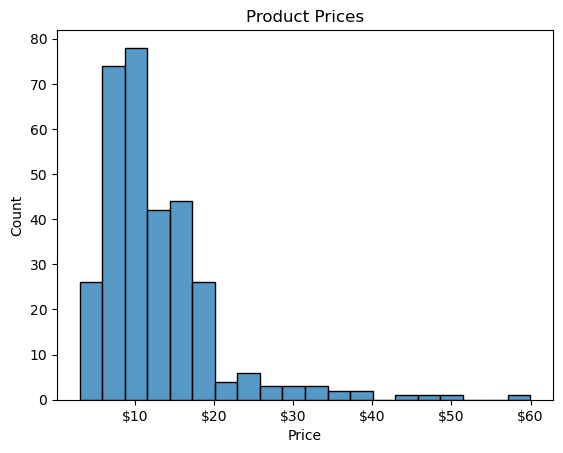

In [9]:
import warnings
warnings.filterwarnings("ignore")
g = sns.histplot(x='Price', data=products_df, bins=20)
plt.title("Product Prices")
xlabels = ['$'+'{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels);

The most expensive item is an injector for making fishing lures.

In [10]:
products_df[products_df['Price'] == 59.99]['Name'].iloc[0]

'FishForm Aluminum Injector for Soft Plastic Plastisol Bait Forms Fishing Lure Making 7oz and 9.5oz'

The average ratings have a left skew with most products falling between 4 to 5 stars. There is a slight uptick at 1 star products, which likely are either low quality products or products with only 1 negative rating and no others.

In [11]:
products_df['Avg Rating'].describe()

count    317.000000
mean       4.186751
std        0.671773
min        1.000000
25%        4.000000
50%        4.300000
75%        4.500000
max        5.000000
Name: Avg Rating, dtype: float64

Text(0.5, 0, 'Rating')

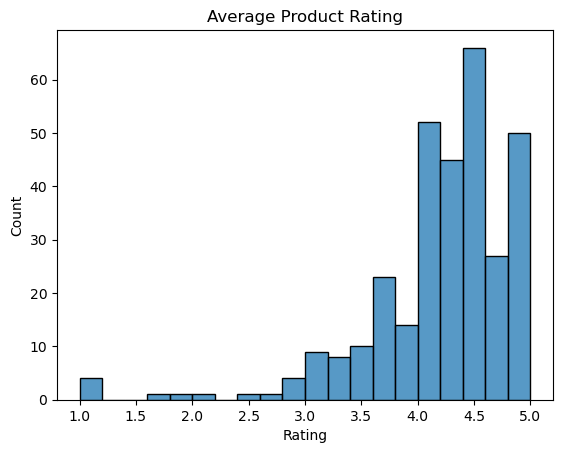

In [12]:
sns.histplot(x='Avg Rating', data=products_df, bins=20)
plt.title("Average Product Rating")
plt.xlabel("Rating")

Taking a closer look at 1 star products, it appears the number of ratings for these products is no more than 2. To better understand the quality of the product, I would prefer to see a high number of ratings before trusting the average rating, even if the rating was 5 stars.

In [13]:
products_df[products_df['Avg Rating'] == 1]

,asin,Name,Price,Avg Rating,# of Ratings
153,B0B84C3CZT,Phuayok 5Inch Soft Fishing Lures Paddle Tail S...,9.99,1.0,1
222,B09QQN6HL1,yurenyule Fishing Lures Kit Baits Tackle for B...,24.99,1.0,2
224,B09LCVS4J2,ZRM&E 100pcs Soft Stainless Steel Lure Breaker...,6.98,1.0,1
262,B09TV2FSC7,Remembrance Fishing Lure Fishing in Heaven For...,9.99,1.0,1


There is an extreme right skew in the number of ratings per product. The median is 9, but the mean is 126. Besides the extreme outlier at 7039 ratings, there are a few other very popular products that have over 500 ratings. Since I scraped 25 pages of search results, it makes sense that there are a lot of products with few ratings and a few very popular products with a high number of ratings.

In [14]:
products_df['# of Ratings'].describe()

count     317.000000
mean      126.495268
std       499.747402
min         1.000000
25%         2.000000
50%         9.000000
75%        48.000000
max      7039.000000
Name: # of Ratings, dtype: float64

Text(0.5, 0, 'Number of Ratings')

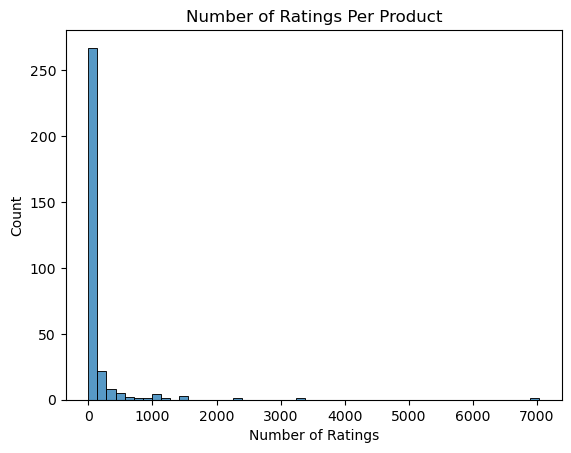

In [15]:
sns.histplot(x='# of Ratings', data=products_df, bins=50)
plt.title("Number of Ratings Per Product")
plt.xlabel("Number of Ratings")

Taking a closer look at products with less than 100 ratings. 259 of the 317 products have less than 100 ratings. The histogram shows a clear right skew as most products have few ratings.

In [16]:
ratings_no_outliers = products_df[products_df['# of Ratings'] < 100]

In [17]:
len(ratings_no_outliers)

259

Text(0.5, 0, 'Number of Ratings')

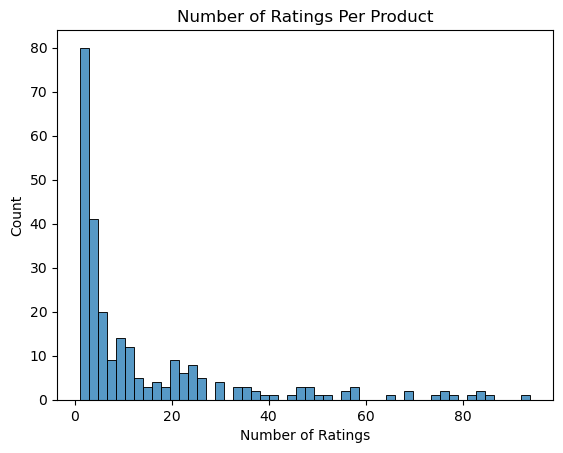

In [18]:
sns.histplot(x='# of Ratings', data=ratings_no_outliers, bins=50)
plt.title("Number of Ratings Per Product")
plt.xlabel("Number of Ratings")

Because there are a lot of products with very few ratings, there are even more products with few or no reviews. I will begin exploring the reviews I collected from the products explored above. A majority of the reviews will come from the most popular products. This should not be a problem since my goal is to understand the qualities that make a soft plastic fishing lure good or bad, and the most important factor is the written reviews that describe the products.

### Exploring Reviews

In [19]:
# Add new column for length of each review
reviews_df['Review Length'] = reviews_df['Body'].str.len()

Most reviews are 5 star reviews, and the review length for each star rating has a right skew.

In [20]:
reviews_df['Rating'].value_counts()

5.0    1782
4.0     361
3.0     181
1.0     141
2.0      97
Name: Rating, dtype: int64

Text(0, 0.5, 'Count')

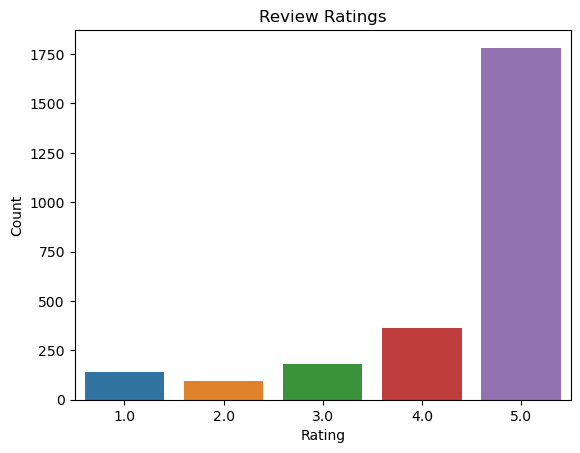

In [21]:
sns.countplot(x='Rating',data=reviews_df)
plt.title("Review Ratings")
plt.ylabel("Count")

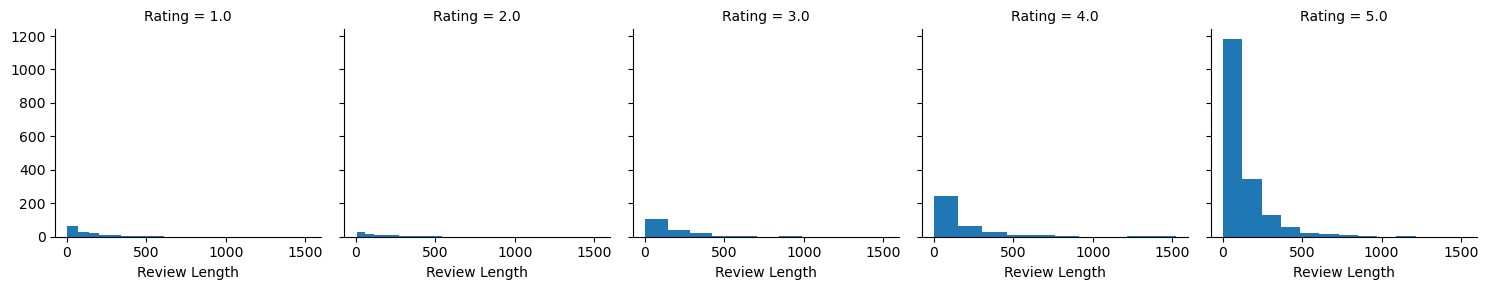

In [22]:
g = sns.FacetGrid(reviews_df,col='Rating')
g.map(plt.hist,'Review Length')

Most reviews are short at over 100 characters regardless of rating. There tends to be outlier reviews that are much longer than the fourth quartile of around 400 characters.

In [23]:
reviews_df['Review Length'].describe()

count    2544.000000
mean      136.152123
std       158.578737
min         3.000000
25%        35.000000
50%        80.000000
75%       178.000000
max      1522.000000
Name: Review Length, dtype: float64

Text(0.5, 1.0, 'Review Length by Rating')

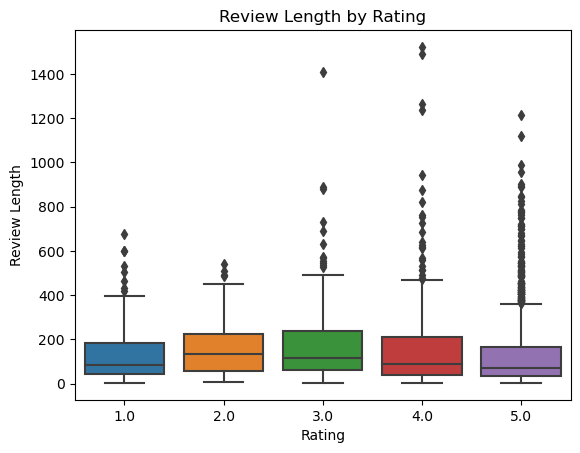

In [24]:
sns.boxplot(x='Rating',y='Review Length',data=reviews_df)
plt.title("Review Length by Rating")

The longest review was 1522 characters. Here it is below.

In [25]:
reviews_df[reviews_df['Review Length'] == 1522]['Body'].iloc[0]

'\nAmazing worm lures, hits on almost every cast. Here\'s the downside: after a big bass hits the plastic worm, and you bring that bass in, chances are the worm lure will be trashed after one catch. They move more freely than the Senko worms and actually mimic a live worm moving much better than the Senko underwater. I am using it with a EWG 4/0 Razor Sharp Eagle Claw hook and the Yum Dinger size 5 worms.... I have also tried them with 1/0, 2/0, 3/0 and live worm hooks, they still break easily...They work fine without a 1/4 ounce Texas Rig weight- if you are casting into shallow water, otherwise I use a 1/4 ounce Texas rig in 12-20 feet of water. I have tried them also as a wacky worm setup with O rings (I use 2 O rings in a crisscross pattern), not as effective. I would give this worm 5 stars if the plastic lure lasted longer, so here is what I do, order them at W-----t for 2.97 and bite the bullet on how long they last. The 7" Senko\'s also do not have a channel to make the lure weed

I am categorizing the reviews as positive or negative based on their rating. I am classifying positive reviews as 4 or 5 stars and negative reviews as 1, 2 or 3 stars. This label is what I will attempt to predict when I build a natural language processing model.

In [26]:
len(reviews_df[(reviews_df["Rating"] == 5) | (reviews_df["Rating"] == 4)])

2143

In [27]:
len(reviews_df[(reviews_df["Rating"] == 1) | (reviews_df["Rating"] == 2) | (reviews_df["Rating"] == 3)])

419

In [28]:
label_list = []
for row in range(len(reviews_df)):
        if (reviews_df["Rating"].iloc[row] == 4) | (reviews_df["Rating"].iloc[row] == 5):
            label_list.append('positive')
        else:
            label_list.append('negative')

In [29]:
# The list added labels correctly as there is the same number of positive labels as reviews with 4 or 5 star ratings above.
label_list.count('positive')

2143

In [30]:
label_list.count('negative')

419

In [31]:
# new column 'Review Label' where value is either 'positive' or 'negative'
reviews_df['Review Label'] = label_list

Text(0.5, 1.0, 'Positive v Negative Reviews')

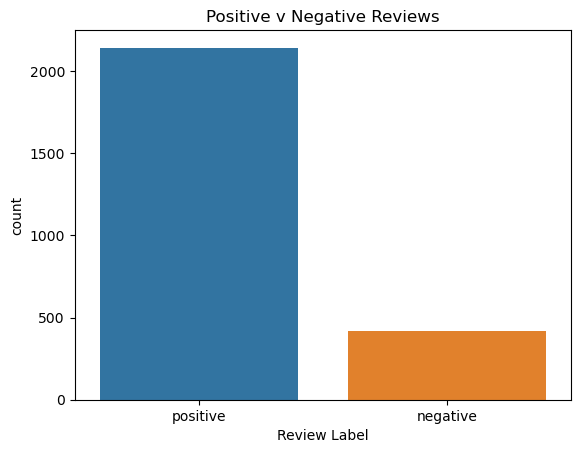

In [32]:
sns.countplot(x='Review Label',data=reviews_df)
plt.title("Positive v Negative Reviews")

There are many more positive reviews than negative reviews since most reviews are 5 star reviews.

In [33]:
reviews_df.head()

,asin,Review ID,Title,Body,Rating,Review Length,Review Label
0,B08CQ4HXHV,R2Y2A5WJ9Q84I9,\nI keep stocked up\n,\nThis is my go to worm on the Little Pigeon R...,5.0,250.0,positive
1,B08CQ4HXHV,RJHR3X7CVOZE8,\nIt just works\n,"\nOne of my most successful soft plastics, the...",4.0,876.0,positive
2,B08CQ4HXHV,R2D40LMXK190YP,\nThese baits catch fish!\n,\nThey catch fish and they’re durable too. I’v...,5.0,132.0,positive
3,B08CQ4HXHV,R1KKR6D1SQ3D4D,\nThese things just catch fish.\n,\nDon't have the action of a Yamamoto but stil...,4.0,132.0,positive
4,B08CQ4HXHV,R1V6NVM2KWFOZ5,\nBass love it\n,"\nIt’s a hit with the bass, but rips easily. ...",4.0,79.0,positive


In [34]:
reviews_df.to_csv('Data/Reviews with Label.csv',index=False)

### Next Steps

On the next notebook, 'Amazon Reviews Text Processing and Modeling', I will process the review text and build a model to predict the proper classification of the review, positive or negative.